<center> <h1> PSI3431 - Experiência 1 - Processos Estocásticos </h1> </center> <br> 
    
 Nome | NUSP 
 :--------------: | :--------------: 
 Bruno Mucha Pasini | 10845791 
 Pedro Henrique Gianjoppe dos Santos | 10774055 
 Caio Hudson Queiroz de Souza | 10773885 

In [1]:
 import Pkg; Pkg.add("PyPlot")
 import Pkg; Pkg.add("WAV")
 import Pkg; Pkg.add("DSP")
 import Pkg; Pkg.add("Statistics")
 using PyPlot
 using Statistics
 using WAV
 using DSP

    Updating registry at `C:\Users\bruno\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Manifest.toml`


# Item a)
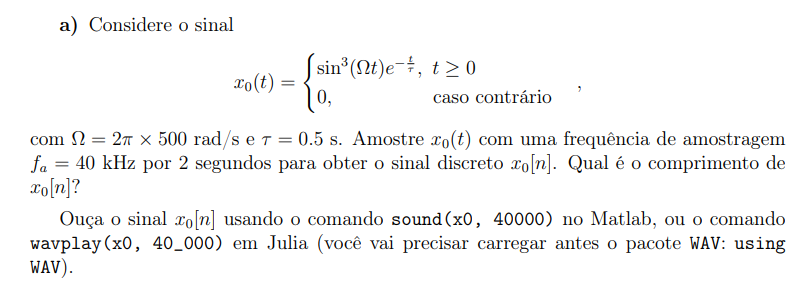

$f_a = 40 kHz$ implica em $T_a = 0,0000025 s$, então tem 80 mil amostras entre 0 e 2s  
explicar melhor as fórmulas aqui?

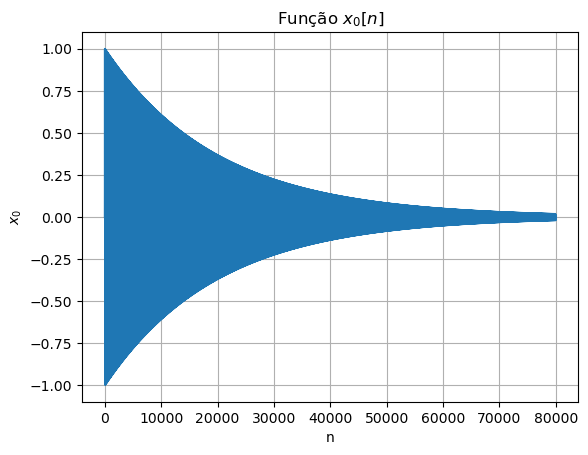

In [5]:
#fa = 40kHz -> Ta = 0,0000025 s -> Há 80k amostras entre 0 e 2s
Nit = 80001
n = 0:Nit-1
Ω = 2*pi*500
fa = 40e3
τ = 0.5
x0 = ((sin.(Ω * n / fa)).^3).*exp.(-(n/fa)/τ)
plot(n,x0)
grid()
xlabel("n")
ylabel(L"$x_0$")
title(L"Função $x_0[n]$");
wavplay(x0, fa)

# Item b)
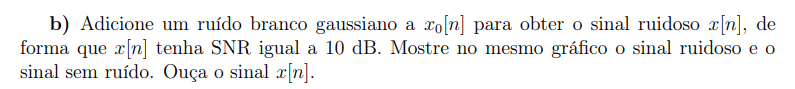

Sabendo que potência de um sinal pode ser representado por $c_x = E\{x^2\} - E\{x\}^2$  
$c_x = r_x - \mu_x$ e sabemos que $\mu_x = 0$,  
Logo, podemos calcular a potência do sinal $x_0[n]$ elevando todos os elementos ao quadrado e calculando a média  
```pot_x = mean(x0.^2)```  
Para um SNR igual a 10 dB, precisamos que a potência de $x_0$ seja 10 vezes maior que a de $v_x$ pois  
$SNR = 10 \cdot log_{10}(\frac{x_0}{v_x})$  
$10 = 10 \cdot log_{10}(\frac{x_0}{v_x})$  
$x_0 = 10 v_x$  

Sabemos também que se a variância $\sigma ^2$ de um sinal é igual à sua potência nos casos onde o valor esperado é zero, então podemos representar seu desvio padrão $\sigma _v$ como $\sigma _v = \sqrt{Pot_v}$

Para fazer um ruído gaussiano com desvio padrão diferente de 1, multiplicamos $\sqrt{Pot_v}$ por todos os termos do vetor gerado pela função randn (com desvio padrão 1) pois $\sigma_{1,2} = \sigma_1 \cdot \sigma_2$

In [6]:
pot_x = mean(x0.^2)
pot_v = pot_x/10 # SNR igual a 10 dB
v = sqrt(pot_v).*randn(Nit,1); #sigma_v = sqrt(pot_v)
wavplay(v, fa)

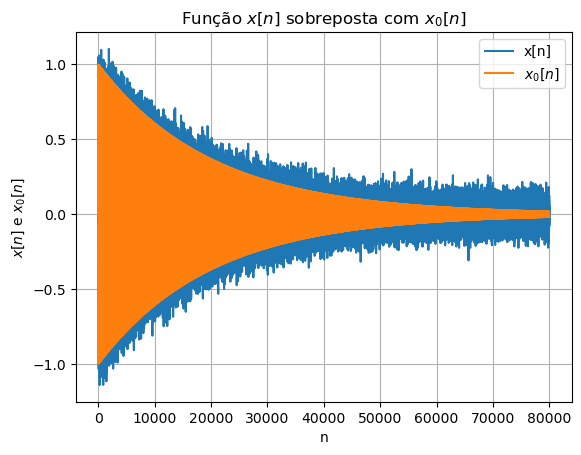

In [27]:
x = x0+v
plot(n, x, label = "x[n]")
grid()
xlabel("n")
ylabel(L"$x[n]$ e $x_0[n]$")
title(L"Função $x[n]$ sobreposta com $x_0[n]$");
plot(n, x0, label = L"$x_0[n]$")
legend()
wavplay(x, fa) #ouvindo o sinal x[n]

# Item c)
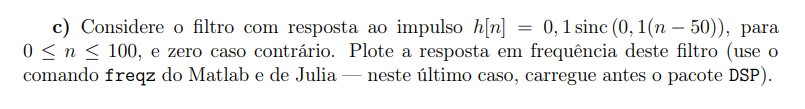

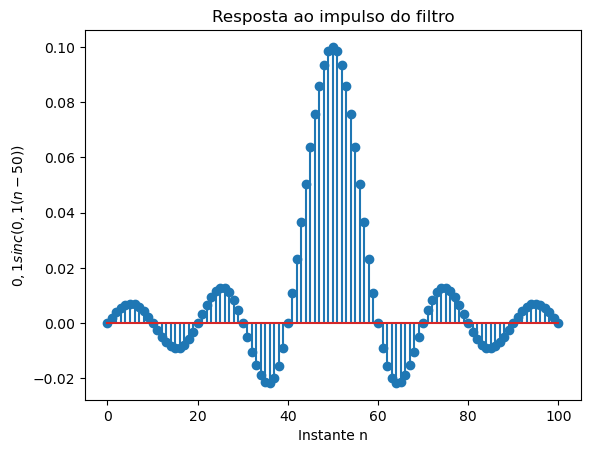

PyObject Text(0.5, 1.0, 'Resposta ao impulso do filtro')

In [23]:
n_h = 0:100

h = 0.1*sinc.(0.1*(n_h.-50))
stem(n_h, h)
xlabel("Instante n")
ylabel(L"$0,1sinc(0,1(n-50))$")
title("Resposta ao impulso do filtro")

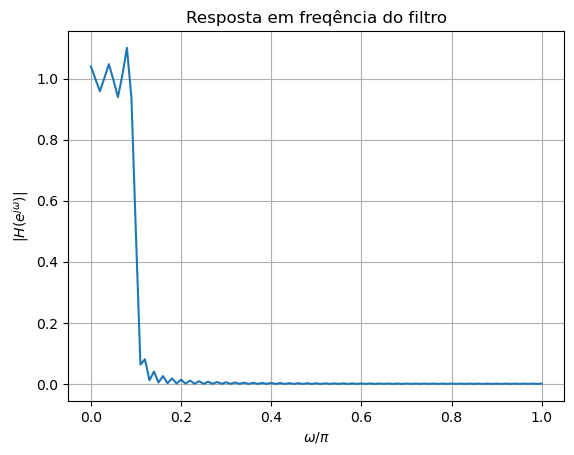

In [28]:
hf= PolynomialRatio(h,[1]);
ω = range(0,π, length=101);
H = freqz(hf, ω);
plot(ω/π, abs.(H))
xlabel(L"\omega/\pi")
ylabel(L"|H(e^{j\omega})|")
title("Módulo da resposta em freqência do filtro")
grid();

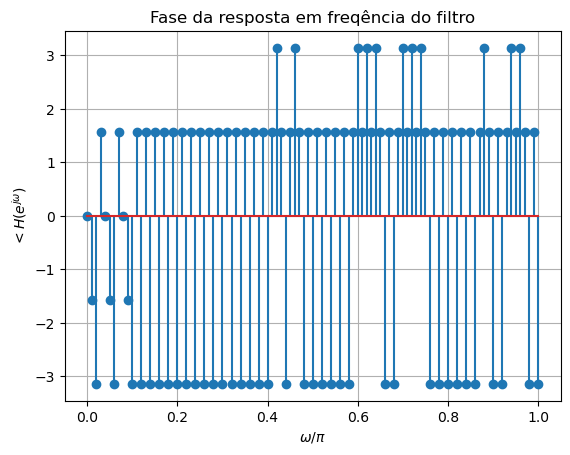

In [29]:
stem(ω/π, angle.(H))
xlabel(L"\omega/\pi")
ylabel(L"<H(e^{j\omega})")
title("Fase da resposta em freqência do filtro")
grid();

# Item d)
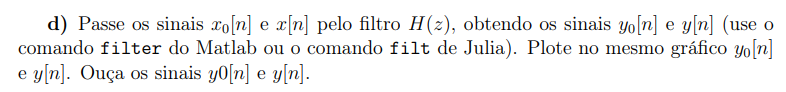

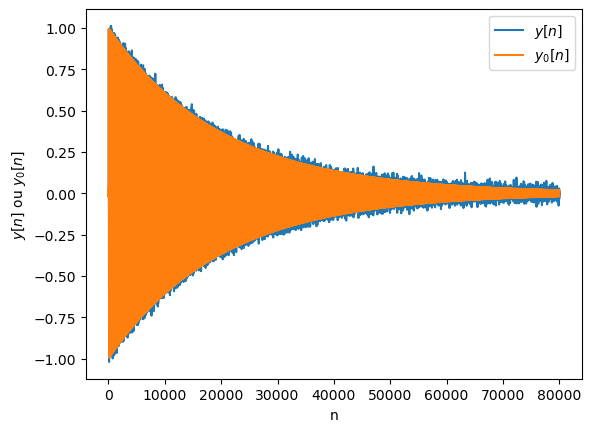

PyObject <matplotlib.legend.Legend object at 0x000000006E2A5B20>

In [33]:
y = filt(h, x)
y0 = filt(h, x0)
plot(n, y, label=L"y[n]")
plot(n, y0, label=L"y_0[n]")
ylabel(L"$y[n]$ ou $y_0[n]$")
xlabel("n")
legend()
#wavplay(y, fa)

In [34]:
wavplay(y0, fa) #sinal sem ruído após o filtro

In [ ]:
wavplay(y, fa)  #sinal com ruído após o filtro

# Item e)
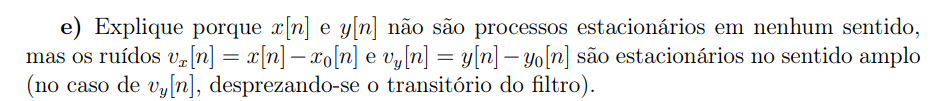

# Item f)
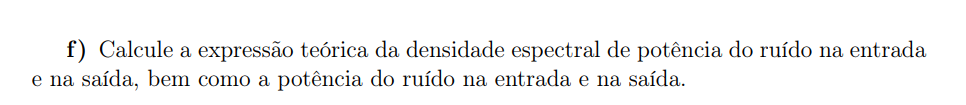

<span style="font-family: 'Times New Romans'; font-size: 1.4em">


# Item g) (a)
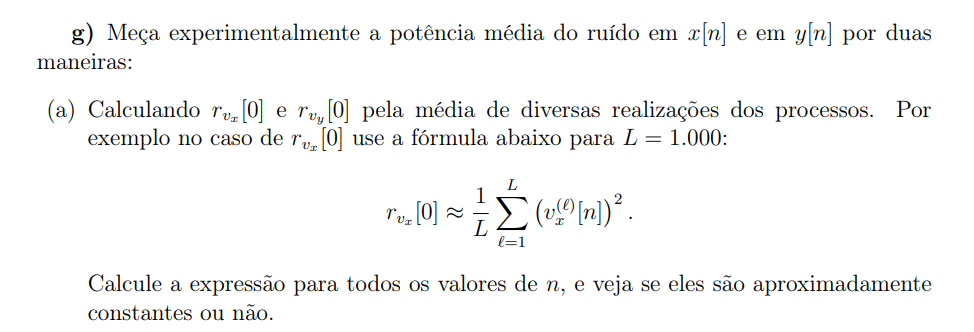

Pelo item e), sabemos que os ruídos $v_x[n]$ e $v_y[n]$ são estacionários no sentido amplo (WSS).

Assim, podemos representar a "autocorrelação amostral" como:

\begin{equation*}
    r_{vx}[l] = E\left \{ V_x[n]*V_x[n+l] \right \}   
\end{equation*}

\begin{equation*}
   r_{vx}[0] = E\left \{ V_x[n]*V_x[n+0] \right \} = E\left \{ (V_x[n])^{2} \right \}
\end{equation*}


Considerando processo independente e igualmente distribuído (iid), temos que a autocorrelação amostral em função de n pode ser aproximada por:

\begin{equation*}
r_{vx}[0] = \sum_{l = 1}^{L}(v_{x}^{l}[n])^{2}\cdot p_{l} = \frac{1}{L} \sum_{l = 1}^{L}(v_{x}^{l}[n])^{2}
\end{equation*}

</span>

In [11]:
L = 1000
N = 80001
n = 0:N-1

r_vx = zeros(N)
r_vy = zeros(N)

v = sqrt(pot_v).*randn(L,N); #sigma_v = sqrt(pot_v), matriz de L linhas e N colunas. Cada linha L é uma observação do processo.
wavplay(v[1,:], fa)

for l in 1:L
    v_x = v[l, :]
    v_y = filt(h, v_x)
    
    #Autocorrelação amostral (em função de n)
    r_vx = r_vx + v_x.^2
    r_vy = r_vy + v_y.^2
end


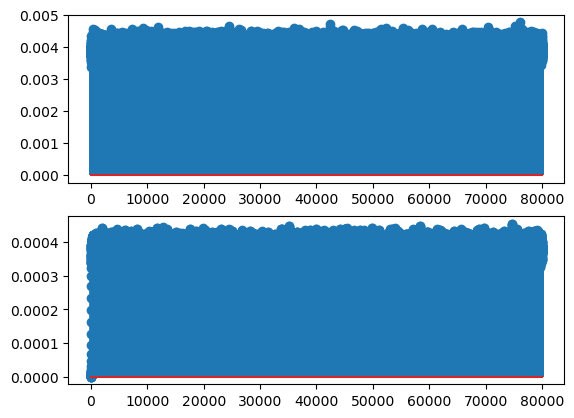

r_vx_media = 0.00390424498932407
r_vy_media = 0.00038226446123097306

In [12]:
#Cálculo da Autocorrelação Amostral (ou seja, a média de diversas realizações dos processos em função de N)
r_vx = r_vx/L
r_vy = r_vy/L

subplot(211)
stem(n, r_vx)

subplot(212)
stem(n, r_vy)

r_vx_media = sum(r_vx)/N

r_vy_media = sum(r_vy)/N

print("r_vx_media = ", r_vx_media)
print("\n")
print("r_vy_media = ", r_vy_media)

# Item g) (b)
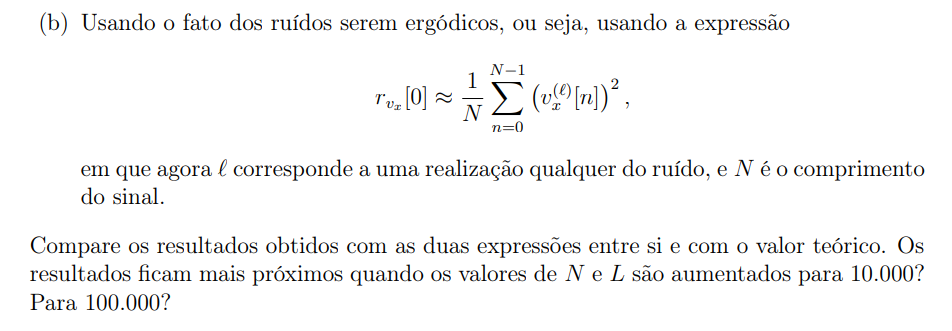

<span style="font-family: 'Times New Romans'; font-size: 1.4em">


Novamente pelo item e), sabemos que os ruídos $v_x[n]$ e $v_y[n]$ são estacionários no sentido amplo (WSS).

Como o processo é estacionário (WSS) e gaussiano com variância finita, pode-se considerá-lo independente e igualmente distribuído (iid) e, consequentemente, ergódico de segunda ordem, ou seja:

\begin{equation*}
    Pr\left \{ r_{v_{x}}[l] = \bar{r_{v_{x}}}[l] \right \} = 1
\end{equation*}

Assim, podemos representar a autocorrelação média ("autocorrelação temporal") como:

\begin{equation*}
    \bar{r_{v_{x}}}[l] = \lim_{N \rightarrow \infty  }\frac{1}{2N+1}\sum_{n=-N}^{N} v_x[n]*v_x[n+l]
\end{equation*}

Para L = 0 e considerando o intervalo de 0 a N, temos a equação correspondente:

\begin{equation*}
   \bar{r_{v_{x}}}[0] = \lim_{N \rightarrow \infty  }\frac{1}{N}\sum_{n=0}^{N} (v_x[n])^2
\end{equation*}

Essa expressão pode ser calculada para cada realização l, sendo tirada a média entre os valores de $ \bar{r_{v_{x}}}[0] $ para as L observações.

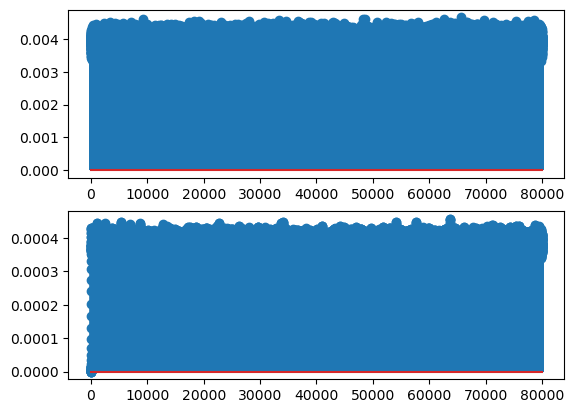


r_vx_amostral_media = 0.003904965113544976
r_vy_amostral_media = 0.0003821128544059585

r_vx_temporal_media = 0.0039049651135449758
r_vy_temporal_media = 0.00038211285440595857

diferença (%) entre amostral e temporal para vx = 1.1105883314806387e-14 %
diferença (%) entre amostral e temporal para vy = 1.4186936659995776e-14 %


In [20]:
L = 1000
N = 80001
n = 0:N-1

r_vx_amostral = zeros(N)
r_vy_amostral = zeros(N)
r_vx_temporal = zeros(L) #Cada elemento corresponde ao r_vx de uma realização
r_vy_temporal = zeros(L) #Cada elemento corresponde ao r_vx de uma realização


for l in 1:L
    v = sqrt(pot_v).*randn(N,1); #sigma_v = sqrt(pot_v), matriz de 1 linhas e N colunas. A cada laço do for é uma observação
    v_x = v
    v_y = filt(h, v_x)
    
    r_vx_temporal[l] = sum(v_x.^2)/N
    r_vy_temporal[l] = sum(v_y.^2)/N

    r_vx_amostral = r_vx_amostral + v_x.^2
    r_vy_amostral = r_vy_amostral + v_y.^2
end

#Cálculo da Autocorrelação Amostral (ou seja, a correlação de diversas realizações dos processos em função de N)
r_vx_amostral = r_vx_amostral/L
r_vy_amostral = r_vy_amostral/L

subplot(211)
stem(n, r_vx_amostral)

subplot(212)
stem(n, r_vy_amostral)

r_vx_amostral_media = sum(r_vx_amostral)/N

r_vy_amostral_media = sum(r_vy_amostral)/N

print("\n")
print("r_vx_amostral_media = ", r_vx_amostral_media)
print("\n")
print("r_vy_amostral_media = ", r_vy_amostral_media)
print("\n")

#Cálculo da Autocorrelação Temporal (ou seja, a correlação de cada realização L)

#print(r_vx_temporal)
#print("\n")
#print(r_vy_temporal)

r_vx_temporal_media = sum(r_vx_temporal)/L #Média da autocorrelação de cada realização L de vx

r_vy_temporal_media = sum(r_vy_temporal)/L #Média da autocorrelação de cada realização L de vy

print("\n")
print("r_vx_temporal_media = ", r_vx_temporal_media)
print("\n")
print("r_vy_temporal_media = ", r_vy_temporal_media)
print("\n")

#Cálculo da diferença entre os valores
print("\n")
print("diferença (%) entre amostral e temporal para vx = ", ((max(r_vx_temporal_media,r_vx_amostral_media)-min(r_vx_temporal_media,r_vx_amostral_media))/max(r_vx_temporal_media,r_vx_amostral_media))*100," %")
print("\n")
print("diferença (%) entre amostral e temporal para vy = ", ((max(r_vy_temporal_media,r_vy_amostral_media)-min(r_vy_temporal_media,r_vy_amostral_media))/max(r_vy_temporal_media,r_vy_amostral_media))*100," %")
print("\n")


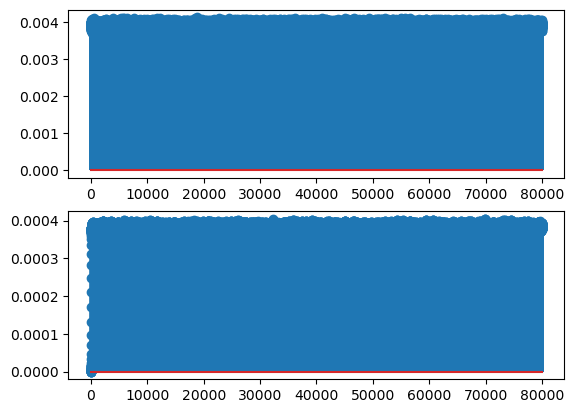


r_vx_amostral_media = 0.0039047360419186975
r_vy_amostral_media = 0.0003822720721966866

r_vx_temporal_media = 0.0039047360419186966
r_vy_temporal_media = 0.0003822720721966866

diferença (%) entre amostral e temporal para vx = 2.2213069684531145e-14 %
diferença (%) entre amostral e temporal para vy = 0.0 %


In [21]:
#Recalculando para L = 10.000
L = 10000
N = 80001
n = 0:N-1

r_vx_amostral = zeros(N)
r_vy_amostral = zeros(N)
r_vx_temporal = zeros(L) #Cada elemento corresponde ao r_vx de uma realização
r_vy_temporal = zeros(L) #Cada elemento corresponde ao r_vx de uma realização

for l in 1:L
    v = sqrt(pot_v).*randn(N,1); #sigma_v = sqrt(pot_v), matriz de 1 linhas e N colunas. A cada laço do for é uma observação
    v_x = v
    v_y = filt(h, v_x)
    
    r_vx_temporal[l] = sum(v_x.^2)/N
    r_vy_temporal[l] = sum(v_y.^2)/N

    r_vx_amostral = r_vx_amostral + v_x.^2
    r_vy_amostral = r_vy_amostral + v_y.^2
end

#Cálculo da Autocorrelação Amostral (ou seja, a correlação de diversas realizações dos processos em função de N)
r_vx_amostral = r_vx_amostral/L
r_vy_amostral = r_vy_amostral/L

subplot(211)
stem(n, r_vx_amostral)

subplot(212)
stem(n, r_vy_amostral)

r_vx_amostral_media = sum(r_vx_amostral)/N

r_vy_amostral_media = sum(r_vy_amostral)/N

print("\n")
print("r_vx_amostral_media = ", r_vx_amostral_media)
print("\n")
print("r_vy_amostral_media = ", r_vy_amostral_media)
print("\n")

#Cálculo da Autocorrelação Temporal (ou seja, a correlação de cada realização L)

#print(r_vx_temporal)
#print("\n")
#print(r_vy_temporal)

r_vx_temporal_media = sum(r_vx_temporal)/L #Média da autocorrelação de cada realização L de vx

r_vy_temporal_media = sum(r_vy_temporal)/L #Média da autocorrelação de cada realização L de vy

print("\n")
print("r_vx_temporal_media = ", r_vx_temporal_media)
print("\n")
print("r_vy_temporal_media = ", r_vy_temporal_media)
print("\n")

#Cálculo da diferença entre os valores
print("\n")
print("diferença (%) entre amostral e temporal para vx = ", ((max(r_vx_temporal_media,r_vx_amostral_media)-min(r_vx_temporal_media,r_vx_amostral_media))/max(r_vx_temporal_media,r_vx_amostral_media))*100," %")
print("\n")
print("diferença (%) entre amostral e temporal para vy = ", ((max(r_vy_temporal_media,r_vy_amostral_media)-min(r_vy_temporal_media,r_vy_amostral_media))/max(r_vy_temporal_media,r_vy_amostral_media))*100," %")
print("\n")


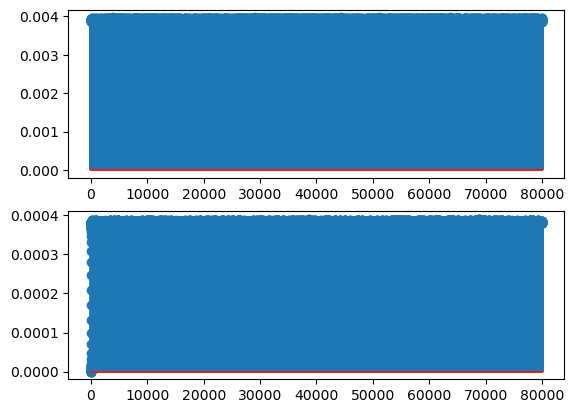


r_vx_amostral_media = 0.003904907318569411
r_vy_amostral_media = 0.0003823508544366276

r_vx_temporal_media = 0.003904907318569411
r_vy_temporal_media = 0.0003823508544366276

diferença (%) entre amostral e temporal para vx = 0.0 %
diferença (%) entre amostral e temporal para vy = 0.0 %


In [22]:
#Recalculando para L = 100.000
L = 100000
N = 80001
n = 0:N-1

r_vx_amostral = zeros(N)
r_vy_amostral = zeros(N)
r_vx_temporal = zeros(L) #Cada elemento corresponde ao r_vx de uma realização
r_vy_temporal = zeros(L) #Cada elemento corresponde ao r_vx de uma realização

for l in 1:L
    v = sqrt(pot_v).*randn(N,1); #sigma_v = sqrt(pot_v), matriz de 1 linhas e N colunas. A cada laço do for é uma observação
    v_x = v
    v_y = filt(h, v_x)
    
    r_vx_temporal[l] = sum(v_x.^2)/N
    r_vy_temporal[l] = sum(v_y.^2)/N

    r_vx_amostral = r_vx_amostral + v_x.^2
    r_vy_amostral = r_vy_amostral + v_y.^2
end

#Cálculo da Autocorrelação Amostral (ou seja, a correlação de diversas realizações dos processos em função de N)
r_vx_amostral = r_vx_amostral/L
r_vy_amostral = r_vy_amostral/L

subplot(211)
stem(n, r_vx_amostral)

subplot(212)
stem(n, r_vy_amostral)

r_vx_amostral_media = sum(r_vx_amostral)/N

r_vy_amostral_media = sum(r_vy_amostral)/N

print("\n")
print("r_vx_amostral_media = ", r_vx_amostral_media)
print("\n")
print("r_vy_amostral_media = ", r_vy_amostral_media)
print("\n")

#Cálculo da Autocorrelação Temporal (ou seja, a correlação de cada realização L)

#print(r_vx_temporal)
#print("\n")
#print(r_vy_temporal)

r_vx_temporal_media = sum(r_vx_temporal)/L #Média da autocorrelação de cada realização L de vx

r_vy_temporal_media = sum(r_vy_temporal)/L #Média da autocorrelação de cada realização L de vy

print("\n")
print("r_vx_temporal_media = ", r_vx_temporal_media)
print("\n")
print("r_vy_temporal_media = ", r_vy_temporal_media)
print("\n")

#Cálculo da diferença entre os valores
print("\n")
print("diferença (%) entre amostral e temporal para vx = ", ((max(r_vx_temporal_media,r_vx_amostral_media)-min(r_vx_temporal_media,r_vx_amostral_media))/max(r_vx_temporal_media,r_vx_amostral_media))*100," %")
print("\n")
print("diferença (%) entre amostral e temporal para vy = ", ((max(r_vy_temporal_media,r_vy_amostral_media)-min(r_vy_temporal_media,r_vy_amostral_media))/max(r_vy_temporal_media,r_vy_amostral_media))*100," %")
print("\n")


<span style="font-family: 'Times New Romans'; font-size: 1.4em">


Em uma primeira execução do código, foi possível obter os seguintes valores a partir da alteração do número L de observações:

### L = 1.000
r_vx_amostral_media = 0.003904965113544976
r_vy_amostral_media = 0.0003821128544059585

r_vx_temporal_media = 0.0039049651135449758
r_vy_temporal_media = 0.00038211285440595857

diferença (%) entre amostral e temporal para vx = 1.1105883314806387e-14 %

diferença (%) entre amostral e temporal para vy = 1.4186936659995776e-14 %


### L = 10.000
r_vx_amostral_media = 0.0039047360419186975
r_vy_amostral_media = 0.0003822720721966866

r_vx_temporal_media = 0.0039047360419186966
r_vy_temporal_media = 0.0003822720721966866

diferença (%) entre amostral e temporal para vx = 2.2213069684531145e-14 %

diferença (%) entre amostral e temporal para vy = 0.0 %

### L = 100.000
r_vx_amostral_media = 0.003904907318569411
r_vy_amostral_media = 0.0003823508544366276

r_vx_temporal_media = 0.003904907318569411
r_vy_temporal_media = 0.0003823508544366276

diferença (%) entre amostral e temporal para vx = 0.0 %

diferença (%) entre amostral e temporal para vy = 0.0 %

<span style="font-family: 'Times New Romans'; font-size: 1.4em">

### Conclusão

Assim, com os valores calculados, podemos comparar a autocorrelação amostral com a autocorrelação temporal, representadas respectivamente por:

\begin{equation*}
   r_{v_{x}}[0] = \frac{1}{L} \sum_{l = 1}^{L}(v_{x}^{l}[n])^{2}
\end{equation*}

\begin{equation*}
   \bar{r_{v_{x}}}[0] = \lim_{N \rightarrow \infty  }\frac{1}{N}\sum_{n=0}^{N} (v_x[n])^2
\end{equation*}


Portanto, obteve-se a seguinte tabela para comparação entre os valores de autocorrelação amostral e temporal de acordo com a variação de L:

 | L | $ r_{v_{x}}[0] $ | $ \bar{r_{v_{x}}}[0] $ |  $ r_{v_{y}}[0] $ | $ \bar{r_{v_{y}}}[0] $ | % Desvio para $r_{v_{x}}$ | % Desvio para $r_{v_{y}}$ |
 | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
 | L = 1.000  |   0.003904965113544976     |  0.0039049651135449758  | 0.0003821128544059585  |  0.00038211285440595857  | 1.110588331480e-14| 1.418693665999e-14|
 | L = 10.000 | 0.0039047360419186975 | 0.0039047360419186966 | 0.0003822720721966866 | 0.0003822720721966866 | 2.221306968453e-14| 0.0|
 | L = 100.000| 0.003904907318569411 | 0.003904907318569411 | 0.0003823508544366276 | 0.0003823508544366276 | 0.0 | 0.0 |
 
 <span style="color:red"> (Adicionar comparação com valor real) </span>.
 
 Pela teoria dos processos ergódicos, temos que a igualdade entre a autocorrelação e as expressões de autocorrelação amostral $ r_{v_{x}}[0] $ e temporal $ \bar{r_{v_{x}}}[0] $ é valida para L e N tendendo para infinito.
 
 Ou seja, sendo mantido N = 80.001, temos que quanto maior a quantidade L de observações, as expressões convergem para valores mais próximos do parâmetro real da autocorrelação, visto que o espaço mostral será cada vez maior, fazendo com que a $Pr\left \{ r_{v_{x}}[l] = \bar{r_{v_{x}}}[l] \right \}$ tenda a 1.
 
 